## PART - I

In [1]:
import pandas as pd
import numpy as np

In [2]:
computer_data=pd.read_csv("DS1_C8_Computers_Data_Project.csv")
computer_data

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [3]:
computer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     6259 non-null   int64 
 1   price     6259 non-null   int64 
 2   speed     6259 non-null   int64 
 3   hd        6259 non-null   int64 
 4   ram       6259 non-null   int64 
 5   screen    6259 non-null   int64 
 6   cd        6259 non-null   object
 7   multi     6259 non-null   object
 8   premium   6259 non-null   object
 9   ads_2022  6259 non-null   int64 
 10  ads_2023  6259 non-null   int64 
 11  trend     6259 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 586.9+ KB


In [4]:
computer_data.isnull().sum()

index       0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads_2022    0
ads_2023    0
trend       0
dtype: int64

In [5]:
num_col=computer_data.select_dtypes(exclude='object')

In [8]:
outliers={}
for col in num_col:
    Q1=computer_data[col].quantile(0.25)
    Q3=computer_data[col].quantile(0.75)
    IQR = Q3-Q1
    lb = Q1-1.5*IQR
    ub = Q3+1.5*IQR
    outliers[col]=computer_data[(computer_data[col]<lb)|(computer_data[col]>ub)][col].tolist()
outliers

{'index': [],
 'price': [4395,
  4195,
  3995,
  3895,
  3990,
  4020,
  3895,
  4020,
  3995,
  3895,
  3995,
  3895,
  3895,
  4020,
  3995,
  3895,
  3999,
  3990,
  3999,
  3990,
  4098,
  4398,
  3999,
  4248,
  3948,
  3899,
  3895,
  4295,
  4494,
  4594,
  4495,
  3895,
  4694,
  3999,
  4095,
  4395,
  3899,
  3948,
  4248,
  4095,
  3899,
  3849,
  4999,
  4248,
  3890,
  4104,
  3814,
  4048,
  3914,
  5399,
  3904,
  3899,
  4999,
  3899,
  3904,
  5399,
  3899,
  5399,
  3995,
  3895,
  3994,
  4799,
  3799,
  3799,
  3799,
  3799,
  3928,
  3984,
  4348,
  3984,
  4292,
  3872,
  3928,
  4348,
  4188],
 'speed': [],
 'hd': [1000,
  1000,
  1370,
  1370,
  1100,
  1100,
  1100,
  1370,
  1100,
  1370,
  1100,
  1100,
  1200,
  1370,
  1370,
  1370,
  1370,
  1370,
  1200,
  1370,
  1000,
  1200,
  1060,
  1000,
  1000,
  1060,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1080,
  1000,
  1000,
  2100,
  1000,
  1000,
  1000,
  1000,
  1080,
  1000,
  1080,
  1000,
  10

### Task 1

In [35]:
# a)
Filter_data=computer_data[(computer_data['ram']>=8)&(computer_data['screen']==14)&(computer_data['speed']>33)]
probability=len(Filter_data)/len(computer_data)
print(f"The Probability of a customer purchasing computer witn at least 8GB of RAM, Computer Size of 14inch and processor speed exceeding 33 MHz : {probability:.4f}")

The Probability of a customer purchasing computer witn at least 8GB of RAM, Computer Size of 14inch and processor speed exceeding 33 MHz : 0.1602


In [22]:
#b) I.
premium_probability=len(premium)/len(computer_data)
print(f"The probability of selling premium computer : {premium_probability:.4f}")

The probability of selling premium computer : 0.4510


In [28]:
# II.
premium_CD = premium[premium['cd']=='yes']
prob_premium_CD=len(premium_CD)/len(premium)
print(f"The probability that a premium computer has a CD player : {prob_premium_CD:.4f}")

The probability that a premium computer has a CD player : 0.5012


In [34]:
#c) I
screen15_premium=premium[premium['screen']>15]
prob_screen15_premium = len(screen15_premium)/len(computer_data)
print(f"The probability of a computer having screen size greater than 15 and being premium : {prob_screen15_premium:.4f}")

The probability of a computer having screen size greater than 15 and being premium : 0.0406


In [39]:
# II
non_premium_screen_14=non_premium[non_premium['screen']<=14]
prob_non_premium_screen_14=len(non_premium_screen_14)/len(non_premium)
print(f"The probability that the computer in Non-Premium and has screen size less than equal to 14 : {prob_non_premium_screen_14:.4f}")

The probability that the computer in Non-Premium and has screen size less than equal to 14 : 0.6775


In [8]:
#d) I
CD_and_multikit=computer_data[(computer_data['cd']=='yes')&(computer_data['multi']=='yes')]
prob_CD_and_multikit = len(CD_and_multikit)/len(computer_data)
print(f"The probability of computers having both CD player and multimedia kit : {prob_CD_and_multikit:.4f}")

The probability of computers having both CD player and multimedia kit : 0.1395


In [9]:
# II
CD_player=computer_data[computer_data['cd']=='yes']
prob_mult_given_CD = len(CD_and_multikit)/len(CD_player)
print(f"The probability that computer has a CD player ad aslo Multimedia kit : {prob_mult_given_CD:.4f}")

The probability that computer has a CD player ad aslo Multimedia kit : 0.3002


### Task 2

In [5]:
# a)
import statistics as st
import scipy.stats as sts

C_price=computer_data['price'].tolist()
p_mean=st.mean(C_price)
print(f"Average price of computers in the population :{p_mean:.2f}")


Average price of computers in the population :2219.58


In [4]:
# b)
# 1.Simple Random Sampling
random_sample=computer_data.sample(frac=.5)
average_random_price=random_sample['price'].mean()

# 2.Systematic Sampling
systematic_sample=computer_data[::15]
average_systematic_price=systematic_sample['price'].mean()

# 3.Stratified Sampling
grouped_df=computer_data.groupby(['premium'])
premium=computer_data.premium.unique()
Stratified_sample=[]

for p in premium:
    c_data=grouped_df.get_group(p)
    sample_data=c_data.sample(frac=.5)
    Stratified_sample.append(sample_data)
Stratified_sample=pd.concat(Stratified_sample,ignore_index=False)
average_Stratified_sample=Stratified_sample['price'].mean()

# 4.Cluster Sampling
grouped_df=computer_data.groupby(['premium'])
premium_d=['yes']
Cluster_sample=[]

for p in premium_d:
    pre_data=grouped_df.get_group(p)
    sample_data=pre_data.sample(frac=.6)
    Cluster_sample.append(sample_data)
Cluster_sample=pd.concat(Cluster_sample,ignore_index=False)
average_Cluster_sample=Cluster_sample['price'].mean()

In [5]:
print(f"Average price from Simple Random Sampling : {average_random_price:.2f}")
print(f"Average price from Systematic Sampling : {average_systematic_price:.2f}")
print(f"Average price from Stratified Sampling : {average_Stratified_sample:.2f}")
print(f"Average price from Cluster Sampling : {average_Cluster_sample:.2f}")


Average price from Simple Random Sampling : 2220.91
Average price from Systematic Sampling : 2245.22
Average price from Stratified Sampling : 2225.17
Average price from Cluster Sampling : 2199.62


## Interpretation:
- From the above evaluation the average price of computers from the different sampling techniques all are almost equal
- This show that each sample data that the average price of computers is normally distributed. 

In [13]:
# c)
premium=random_sample[random_sample['premium']=='yes']
non_premium=random_sample[random_sample['premium']=='no']
average_premium_price=premium['price'].mean()
average_nonpremium_price=non_premium['price'].mean()

print(f"Average price of Premium computers : {average_premium_price:.2f}")
print(f"Average price of Non-Premium computers : {average_nonpremium_price:.2f}")
print(f"Average price for both the categories :{average_random_price:.2f}")

Average price of Premium computers : 2197.99
Average price of Non-Premium computers : 2425.76
Average price for both the categories :2220.91


## Interpretation:
- The average price of Non-Premium computer is slightly higher than the Premium computers. This shows that the Non-Premium computers may have some certain features or specification that leads the rise of price
- The Average price for both categories falls closer to the Average price Premium computers. This shows that more likely premium computers are there in a dataset, pulling the overall average close to the price point. 

### Task 3

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Frequency')

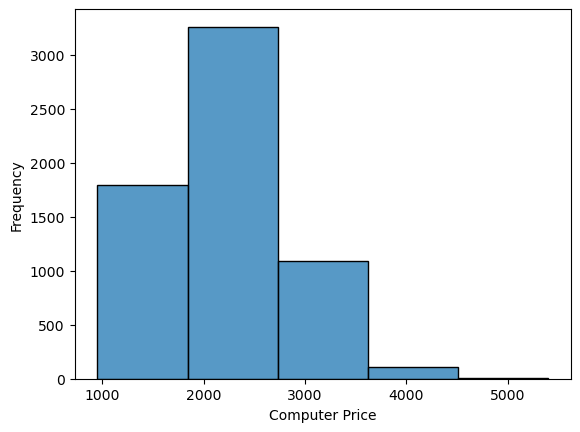

In [16]:
computer_price=computer_data['price']
sns.histplot(computer_price,bins=5)
plt.xlabel('Computer Price')
plt.ylabel('Frequency')

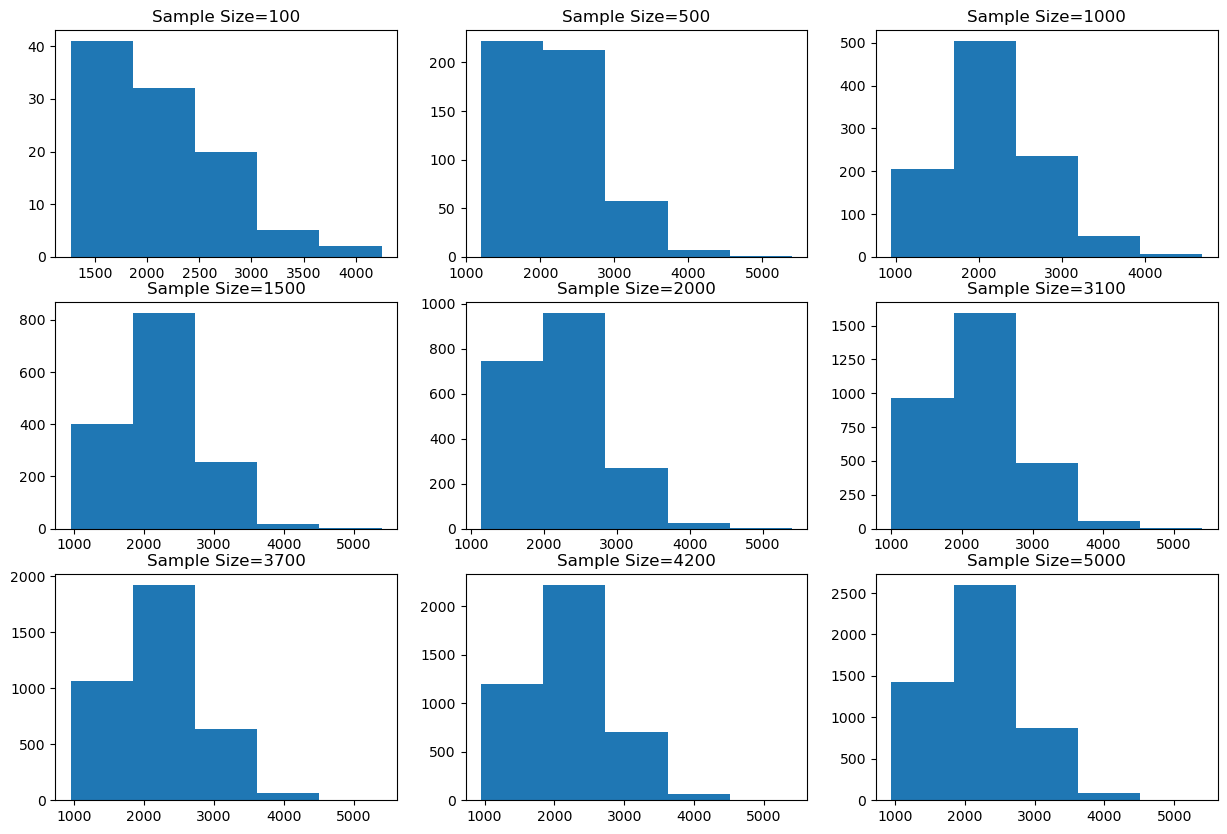

In [17]:
num=[100,500,1000,1500,2000,3100,3700,4200,5000]
sample_data=[]
sample_df=pd.DataFrame()

fig, ax =plt.subplots(3,3, figsize=(15,10))
for i in num:
    sample_df=computer_data.sample(n=i)
    sample_data.append(sample_df['price'].tolist())
k=0
for i in range(0,3):
    for j in range(0,3):
        ax[i,j].hist(sample_data[k],5,density=False)
        ax[i,j].set_title('Sample Size='+str(len(sample_data[k])))
        k=k+1

In [10]:
import statistics as st
import scipy.stats as sts

In [19]:
# Population Parameters
com_price=computer_data['price'].tolist()

p_mean=st.mean(com_price)
p_median=st.median(com_price)
p_std=st.stdev(com_price)
print(f"Population Mean : {p_mean:.2f}")
print(f"Population Median : {p_median:.2f}")
print(f"Population Standard Deviation : {p_std:.2f}")
print("Population Skewness :",sts.skew(com_price))
print("Population Kurtosis :",sts.kurtosis(com_price))

Population Mean : 2219.58
Population Median : 2144.00
Population Standard Deviation : 580.80
Population Skewness : 0.7115541683835676
Population Kurtosis : 0.7288752074124178


In [20]:
# Sample Parameter for sample Size 2000
sample2000=computer_data.sample(n=2000)
sample_price=sample2000['price'].tolist()

s_mean=st.mean(sample_price)
s_median=st.median(sample_price)
s_std=st.stdev(sample_price)
print(f"Sample Mean : {s_mean:.2f}")
print(f"Sample Median : {s_median:.2f}")
print(f"Sample Standard Deviation : {s_std:.2f}")
print("Sample Skewness :",sts.skew(sample_price))
print("Sample Kurtosis :",sts.kurtosis(sample_price))


Sample Mean : 2220.78
Sample Median : 2144.00
Sample Standard Deviation : 588.33
Sample Skewness : 0.8386745647014873
Sample Kurtosis : 1.3945741470517907


## Interpretation:
- From the above measurements it is noted that the sample is near around the median and skewness and kurtosis are near around 0.7 for both the population and sample
- Which implies that the population data and sample data greater than equal to 2000 is normally distributed.
- Also noted that the Population mean = 2219.58 and Sample Mean = 2226.34, thus the sample mean is almost equal to population mean.
- All of the above are nearly equal. So this proves the Central Limit Theorem.

## PART - II

### Task 1

HO : The mean advertising budget in 2023 is equal to or less than 2022
H1 : The mean advertising budget in 2023 is greater than 2022

HO : mu1 <= mu2 = 221.3
H1 : mu1 > mu2 = 221.3    

This is one tailed test because the promoter's belief that advertising budget is inctreased in 2023 than 2022.
Here the sample size is greater than 30 and the poupaltion standard deviation is know. So we use Z-Test.

In [9]:
import math
from scipy.stats import norm

x = 222.2
mu = 221.3
sd = 74.83
n = 40
alpha = 0.05

In [54]:
z_statistics = (x-mu)/(sd/math.sqrt(n))
print(f"The Z-Statistics :{z_statistics:.2f}")

p_value = norm.sf(abs(z_statistics))
print(f"The P-Value :{p_value:.2f}")


z_critical = norm.ppf(1-alpha)
print(f"The Z-Critical :{z_critical:.2f}")


The Z-Statistics :0.08
The P-Value :0.47
The Z-Critical :1.64


## Interpretation:
The P-Value = 0.47 > alpha = 0.05 
The Z-Statistics = 0.08 < Z-Critical = 1.64 
- From the above comparision it show here we are Accepting the Null Hypothesis
- Which means that the mean advertising budget in 2023 is equal to or less than 2022 
 

### Task 2

HO : There is a no significant difference in the average price of computers with and without CD player
H1 : There is a significant difference in the average price of computers with and without CD player

HO : mu1 = mu2
H1 : mu1 !=mu2

In [10]:
With_Cd_price=CD_player['price'].tolist()
without_CD_player=computer_data[computer_data['cd']=='no']
Without_Cd_price=without_CD_player['price'].tolist()

In [11]:
x1=st.mean(With_Cd_price)
x2=st.mean(Without_Cd_price)
v1=st.stdev(With_Cd_price)**2
v2=st.stdev(Without_Cd_price)**2
n1=len(With_Cd_price)
n2=len(Without_Cd_price)
df=n1+n2-2

print("The mean price with CD player =" ,x1)
print("The mean price without CD player =" ,x2)
print("The variance price with CD player =" ,v1)
print("The variance price without CD player =" ,v2)
print("The Sample Size with CD player =" ,n1)
print("The Sample Size without CD player =" ,n2)
print("Degree of freedom =" ,df)

The mean price with CD player = 2342.6055708390645
The mean price without CD player = 2112.8119964189796
The variance price with CD player = 278201.173233489
The variance price without CD player = 364205.29419634154
The Sample Size with CD player = 2908
The Sample Size without CD player = 3351
Degree of freedom = 6257


In [8]:
from scipy.stats import t

In [16]:
alpha = 0.05
signal=abs(x1-x2)
noise=math.sqrt(v1*(n1-1)+v2*(n2-1))*math.sqrt(1/n1+1/n2)

In [17]:
t_statistics = signal/noise
print(f"T-Statistics : {t_statistics:.4f}")

p_value = t.sf(abs(t_statistics),df)*2
print(f"P-Value : {p_value:.4f}")

t_critical = t.ppf(1-alpha/2,df)
print(f"T-Critical : {t_critical:.4f}")


T-Statistics : 0.2013
P-Value : 0.8405
T-Critical : 1.9603


## Interpretation
The P-Value = 0.84 > Alpha = 0.05 
T-Statistics = 0.2013 < T-Critical = 1.96
- From the above analysis it show that here we are Accepting the Null hypothesis.
- Which means that there is a no significant difference in the average price of computers with and without CD player.

### Task 3

a)
HO : The mean price of premium computer is equal to $2200
H1 : The mean price of premium computer is not equal to $2200

HO : mu = $2200
H1 : mu != $2200

In [11]:
premium_s25=premium.sample(n=25)
premium_s25_price=premium_s25['price'].tolist()
s_mean=st.mean(premium_s25_price)
s_std=st.stdev(premium_s25_price)
p_mean=2200
n=len(premium_s25)
df=n-1
alpha = 0.05 

print(f"Sample Mean : {s_mean:.2f}")
print(f"Sample Standard Deviation : {s_std:.2f}")
print(f"Population Mean :", p_mean )
print(f"Sample Size :",n)
print("Degree of Freedom :", df)


Sample Mean : 2186.44
Sample Standard Deviation : 572.46
Population Mean : 2200
Sample Size : 25
Degree of Freedom : 24


In [28]:
t_statistics=(s_mean-p_mean)/((s_std)/(math.sqrt(n)))
print(f"T-Statistics : {t_statistics:.2f}")

p_value = t.sf(abs(t_statistics),df)*2
print(f"P-Value : {p_value:.2f}")

t_critical = t.ppf(1-alpha/2,df)
print(f"T-Critical : {t_critical:.2f}")


T-Statistics : -0.22
P-Value : 0.83
T-Critical : 1.96


## Interpretation
The P-Value = 0.83 > Alpha = 0.05 
T-Statistics = -0.22 < T-Critical = 1.96
- From the above analysis it show that here we are Accepting the Null hypothesis.
- Which implies that the mean price of premium computer is equal to $2200

b)
HO : There is no significant difference in the mean price of premium and Non-premium computers
H1 : There is a significant difference in the mean price of premium and Non-premium computers

HO : mu1=mu2
H1 : mu1!=mu2

In [15]:
non_premium_s25=non_premium.sample(n=25)
non_premium_s25_price=non_premium_s25['price'].tolist()


x1 = st.mean(premium_s25_price)
x2 = st.mean(non_premium_s25_price)
v1 = st.stdev(premium_s25_price)**2
v2 = st.stdev(non_premium_s25_price)**2
n1 = len(premium_s25_price)
n2 = len(non_premium_s25_price)
df = n1+n2-2
alpha = 0.05

print(f"The mean price of premium computers = {x1:.2f}")
print(f"The mean price of non-premium computers = {x2:.2f}")
print(f"The variance price of premium computers = {v1:.2f}")
print(f"The variance price of non-premium computers = {v2:.2f}")
print("The Sample Size of premium computers =" ,n1)
print("The Sample Size of non-premium computers =" ,n2)
print("Degree of freedom =" ,df)

The mean price of premium computers = 2186.44
The mean price of non-premium computers = 2669.44
The variance price of premium computers = 327706.51
The variance price of non-premium computers = 796880.67
The Sample Size of premium computers = 25
The Sample Size of non-premium computers = 25
Degree of freedom = 48


In [16]:
signal=abs(x1-x2)
noise = math.sqrt(v1*(n1-1)+v2*(n2-1))*math.sqrt(1/n1+1/n2)

In [17]:
t_statistics = signal/noise
print(f"T-Statistic : {t_statistics:.2f}")

p_value = t.sf(abs(t_statistics),df)*2
print(f"P-Value : {p_value:.2f}")

t_critical = t.ppf(1-alpha/2,df)
print(f"T-Critical : {t_critical:.2f}")


T-Statistic : 0.33
P-Value : 0.74
T-Critical : 2.01


## Interpretation
- The P-Value = 0.73 > Alpha = 0.05
- T-Statistics = 0.33 < T-Critical = 2.01
- From the above analysis it show that here we are Accepting the Null hypothesis.
- The price analyse disparity between premium and non-premium computers is that there is no significant difference in the mean price of premium and Non-premium computers